## Analyst Task

#### **Analyst Task Report**

#### Data preparation

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime
%matplotlib inline


In [63]:
customers_df = pd.read_csv("/Users/akosaraju/Desktop/DSprojects/liberont/customers_updated.csv") #replace this with your current directory
products_df = pd.read_csv("/Users/akosaraju/Desktop/DSprojects/liberont/products_updated.csv")
purchases_df = pd.read_csv("/Users/akosaraju/Desktop/DSprojects/liberont/purchases_updated.csv")

In [64]:
# first few rows
print("Customers DataFrame:")
print(customers_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

print("\nPurchases DataFrame:")
print(purchases_df.head())

Customers DataFrame:
  customer_id  age  gender region signup_date
0    CUST0001   58    Male  Tokyo  2021-08-02
1    CUST0002   48  Female  Tokyo  2018-08-17
2    CUST0003   34  Female  Tokyo  2018-02-21
3    CUST0004   27    Male  Tokyo  2022-02-27
4    CUST0005   40  Female  Osaka  2019-07-18

Products DataFrame:
  product_id     category  price product_name
0   PROD0001         Food   7666     PROD0001
1   PROD0002     Clothing  13482     PROD0002
2   PROD0003  Electronics  41197     PROD0003
3   PROD0004         Food  38615     PROD0004
4   PROD0005     Clothing   7769     PROD0005

Purchases DataFrame:
  purchase_id customer_id product_id               purchase_date  quantity
0    PUR00001    CUST0850   PROD0189  2024-05-14 05:16:34.158693         5
1    PUR00002    CUST0911   PROD0068  2023-12-12 05:16:34.158693         4
2    PUR00003    CUST0819   PROD0104  2024-07-23 05:16:34.158693         2
3    PUR00004    CUST0141   PROD0080  2024-10-03 05:16:34.158693         4
4    PUR0

In [65]:
# data types
print("\nData Types in Customers DataFrame:")
print(customers_df.dtypes)

print("\nData Types in Products DataFrame:")
print(products_df.dtypes)

print("\nData Types in Purchases DataFrame:")
print(purchases_df.dtypes)


Data Types in Customers DataFrame:
customer_id    object
age             int64
gender         object
region         object
signup_date    object
dtype: object

Data Types in Products DataFrame:
product_id      object
category        object
price            int64
product_name    object
dtype: object

Data Types in Purchases DataFrame:
purchase_id      object
customer_id      object
product_id       object
purchase_date    object
quantity          int64
dtype: object


In [66]:
# missing values
print("\nMissing Values in Customers DataFrame:")
print(customers_df.isnull().sum())

print("\nMissing Values in Products DataFrame:")
print(products_df.isnull().sum())

print("\nMissing Values in Purchases DataFrame:")
print(purchases_df.isnull().sum())


Missing Values in Customers DataFrame:
customer_id    0
age            0
gender         0
region         0
signup_date    0
dtype: int64

Missing Values in Products DataFrame:
product_id      0
category        0
price           0
product_name    0
dtype: int64

Missing Values in Purchases DataFrame:
purchase_id      0
customer_id      0
product_id       0
purchase_date    0
quantity         0
dtype: int64


we see that there are no null values in all 3 datasets, meaning we do not need to do an extra step in data cleansing to account for these missing values. however, we should still make sure there are no duplicates that are causing the lack of missing values

In [67]:
# duplicates check
print(customers_df.duplicated().sum())  
print(products_df.duplicated().sum())   
print(purchases_df.duplicated().sum())  


0
0
0


we see that there are no duplicate rows in any of the datasets

In [68]:
# Convert date columns to datetime
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'])
purchases_df['purchase_date'] = pd.to_datetime(purchases_df['purchase_date'])


#### Database setup

In [69]:
conn = sqlite3.connect('analysis.db')

# Load data into SQL tables
customers_df.to_sql('customers', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)
purchases_df.to_sql('purchases', conn, if_exists='replace', index=False)

5000

#### Analysis 

##### 1. Purchase trends by age group

In this section, we want to look at the purchasing trends by customers grouped into different age groups. Instead of splitting by decade (10-20, 20-30), I decided to start at 18, since most people have graduated highschool at 18. 18-24 would represent the people going to university. We then have young adults who are working entry level to mid level jobs and so on. This way we are able to gain more information by grouping people who are in similar stages of life/income level to see how purchase trends correlate with that. 


/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/2356789251.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_age = purchases_customers.groupby('age_group')['purchase_id'].count().reset_index()
/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/2356789251.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchase_by_age, x='age_group', y='purchase_count', palette='deep')


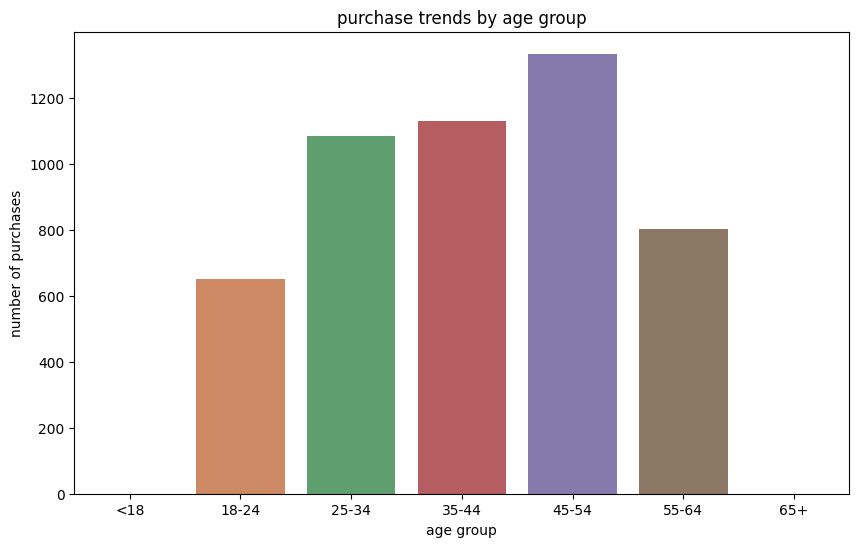

In [70]:
# age bins and labels
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'] # can teenagers afford luxury items? 
customers_df['age_group'] = pd.cut(customers_df['age'], bins=age_bins, labels=age_labels)

# merge purchases with customers on customer id
purchases_customers = purchases_df.merge(customers_df, on='customer_id', how='left')

# total number of purchases per age group
purchase_by_age = purchases_customers.groupby('age_group')['purchase_id'].count().reset_index()
purchase_by_age.rename(columns={'purchase_id': 'purchase_count'}, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=purchase_by_age, x='age_group', y='purchase_count', palette='deep')
plt.title('purchase trends by age group')
plt.xlabel('age group')
plt.ylabel('number of purchases')
plt.show()

we see that the 45-50 age group has the highest number of purchases. They are likely to have the most amount of "spending money" due to the seniority in their career or income levels or family members and other factors. The 25-34, 35-44 age groups also show pretty high acitivity level. This might imply that young adults to middle-aged adults have greater purchasing power or interest in the available products. These age groups could be an important target for marketing campaigns, promotions etc..

The 18-24 and 55-64 age groups show fewer purchases compared to the other age groups. 

The <18 and 65+ groups are either missing or showing very low acrivity. This could indicate that they might be less engaged. It could also mean that they are not the ones making the purchases. For exmaple, a 40 year old mother could be making a purchase for her 15 year old daughter.

##### 2. Sales distribution and repeat purchase rate by product category

In [71]:
# merge purchases with products on product id
purchases_products = purchases_df.merge(products_df, on='product_id', how='left')

In [72]:
# total sales per category
purchases_products['total_sales'] = purchases_products['price'] * purchases_products['quantity']
sales_by_category = purchases_products.groupby('category')['total_sales'].sum().reset_index()
sales_by_category['sales_percentage'] = (sales_by_category['total_sales'] / sales_by_category['total_sales'].sum()) * 100
# we are looking at percentage since it makes it easier to understand relative contributions of each category to the overall sales. 

/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/821259246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='category', y='sales_percentage', palette='magma')


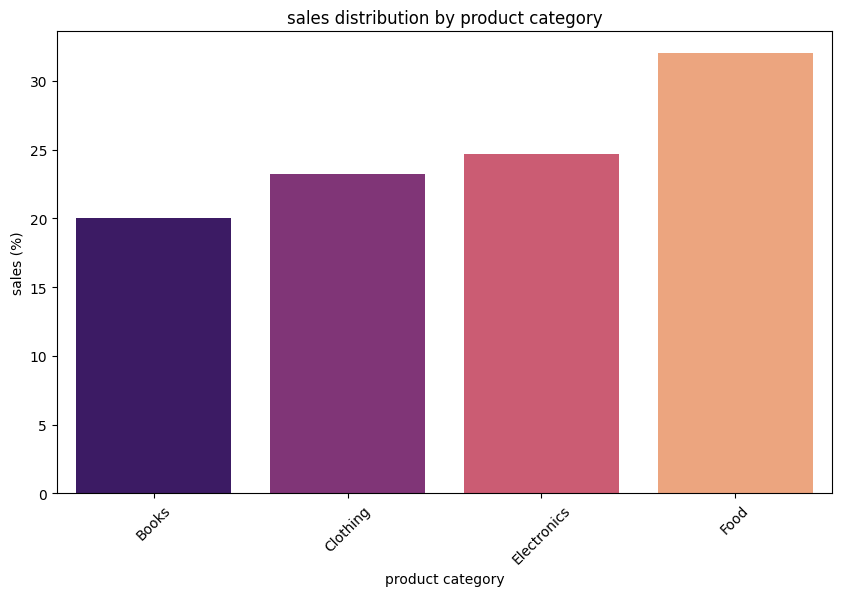

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_category, x='category', y='sales_percentage', palette='magma')
plt.title('sales distribution by product category')
plt.xlabel('product category')
plt.ylabel('sales (%)')
plt.xticks(rotation=45)
plt.show()

From the above plot, we can see that food has the highest sales percentage, contributing over 30% to total sales. It is the most frequenntly purchased or highest revenue item. It is possible this is because it is a necessity purchase and the frequency is much higher than other categories. 

We see that the clothing and electronic cateogries contribution around 25% each to the total sales. These categories do tend to be higher in pricing compared to food but seem to be purchased less often. 

We see that books have the lowest share. This could mean that books are not as popular with customers or are cheaper and less frequenty purcahsed. 

/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/3982909342.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=repeat_rate, x='category', y='repeat_percentage', palette='coolwarm')


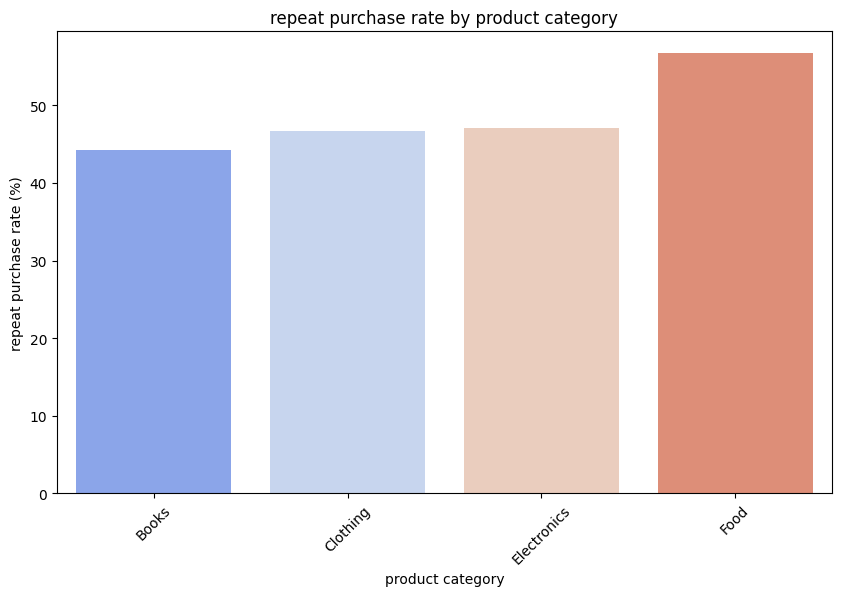

In [74]:
# purchases per customer per category
customer_category_purchases = purchases_products.groupby(['customer_id', 'category'])['purchase_id'].count().reset_index()
customer_category_purchases.rename(columns={'purchase_id': 'purchase_count'}, inplace=True)

# repeat purchases
customer_category_purchases['is_repeat'] = customer_category_purchases['purchase_count'] > 1

# repeat purchase rate per category
repeat_rate = customer_category_purchases.groupby('category')['is_repeat'].mean().reset_index()
repeat_rate['repeat_percentage'] = repeat_rate['is_repeat'] * 100

plt.figure(figsize=(10,6))
sns.barplot(data=repeat_rate, x='category', y='repeat_percentage', palette='coolwarm')
plt.title('repeat purchase rate by product category')
plt.xlabel('product category')
plt.ylabel('repeat purchase rate (%)')
plt.xticks(rotation=45)
plt.show()

as we suspected with the earlier graph, food is the category with the highest repeat purchase rate, it exceeds 50%. This makes sense since food is needed to be repeatedly purchased.

Clothig, electronic and books seem to have a similar rate of repeat purchases falling around 40-45%. 

For books, this shows an interesting amount of engagement, which might indicate that those customers are interested in ongoing book purchases, potentially for collections.
For clothing, this shows that customers are returning to buy more items probably due to climate, style changes or need for variety. 
Electronics also have a similar repeat rate since customers are coming back for related products, which is interesting since usually elctronics are meant to last a long time. 

##### 3. Sales trend over a specific period

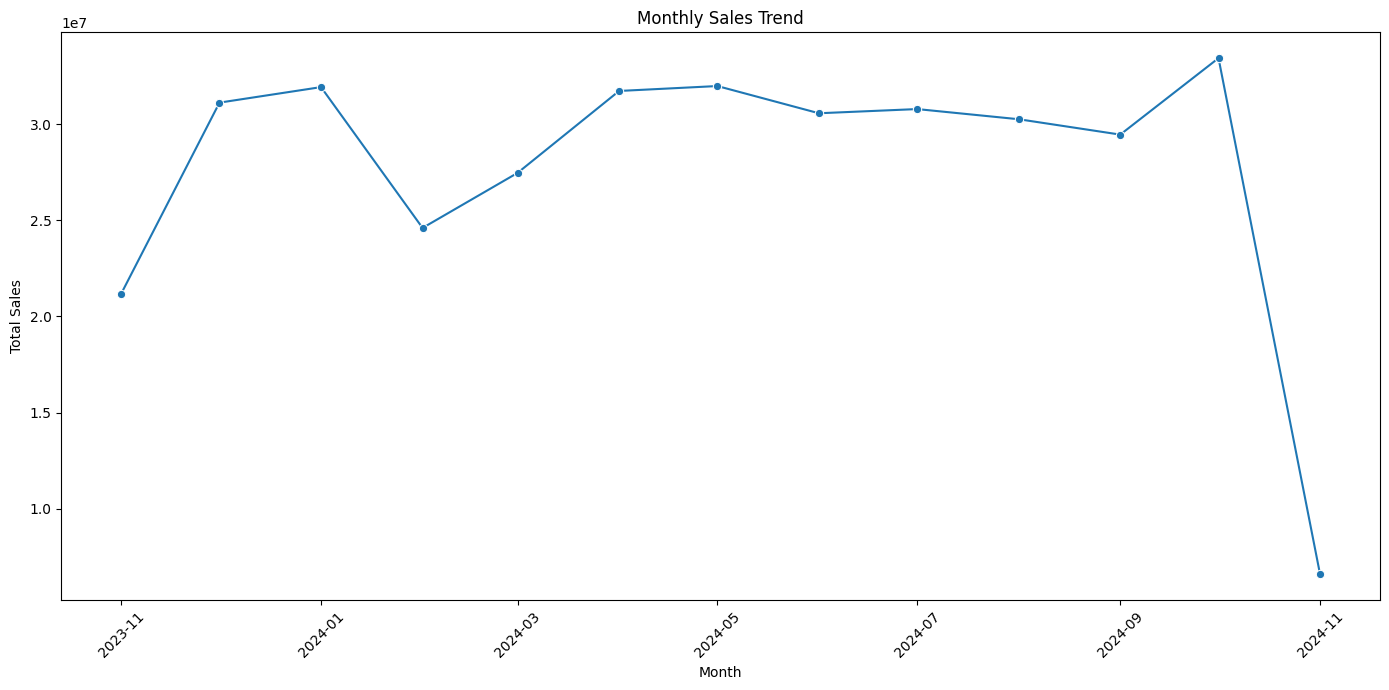

In [75]:
# extract month and year from purchase_date
purchases_products['year_month'] = purchases_products['purchase_date'].dt.to_period('M')

# monthly sales
monthly_sales = purchases_products.groupby('year_month')['total_sales'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_sales, x='year_month', y='total_sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

nov 2023- jan 2024: there is an increase in sales
jan 2024 - feb 2024: significant decline in sales. this could be due to post-holiday season
feb 2024 - april 2024: the sales go back up likely due to spring and summer items coming in 
april 2024 - sep 2024: shows a pretty stable market with pretty consistent performance. 
sep 2024 - oct 2024: there is another spike in the sales, could be due to winter/fall items coming in and promotions
There is a sharp decline in sales for nov 2024, this could be due to not enough data available for the month. 

The trend seems to be following a seasonal pattern driven by holiday/seasonal promotions. The spike in sep-oct could be due to promotions or black friday discounts causing people to purhcase more. 


/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/3128568099.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonality, x='month', y='total_sales', palette='pastel')


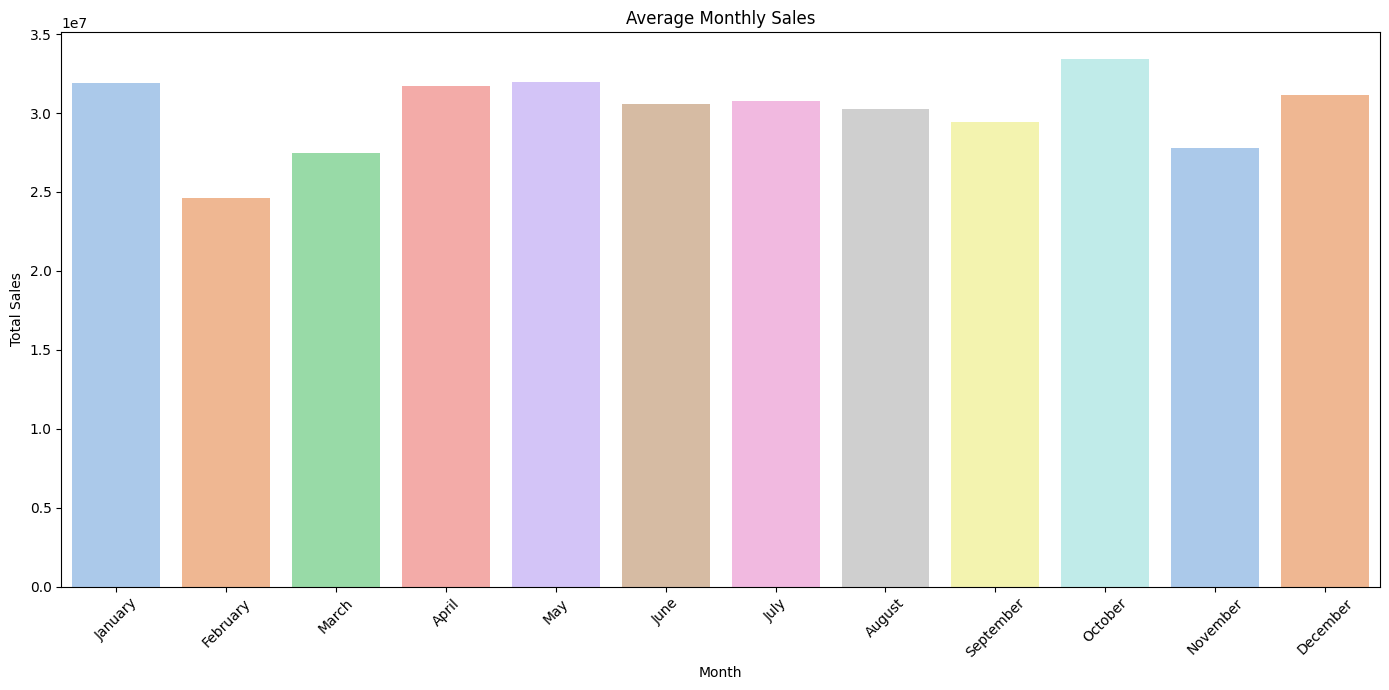

In [76]:
# month column
purchases_products['month'] = purchases_products['purchase_date'].dt.month_name()

# average sales per month
seasonality = purchases_products.groupby('month')['total_sales'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
seasonality['month'] = pd.Categorical(seasonality['month'], categories=month_order, ordered=True)
seasonality = seasonality.sort_values('month')

plt.figure(figsize=(14,7))
sns.barplot(data=seasonality, x='month', y='total_sales', palette='pastel')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

High sales:
- January, April, May, and October show the highest sales values, hovering around similar levels of total sales. 
- January likely benefits from post-holiday sales or extended holiday spending behavior, where customers may use gift cards or take advantage of New Year deals.
- April and May might indicate a general spring uptick where customers start spending more as the weather improves, or due to seasonal campaigns like spring sales.
- October often sees increased spending due to early holiday shopping, promotions like Black Friday, or Halloween-related purchases.

Stable Sales:

- March, June, July, August, and September all display relatively stable sales levels, slightly below the peak months but without significant dips.
- This stability suggests a steady base demand without any specific seasonal peaks. These months represent non-peak periods when regular consumer buying activity continues without major fluctuations.

Low Sales :

- February appears to have the lowest sales of all the months, which could indicate a typical post-holiday spending cooldown. 

Spikes:

- There is a noticeable increase in December compared to November. This makes sense, as December typically sees increased spending due to the holiday season (Christmas, year-end celebrations).


#### 4. Additional Analysis

##### customer acquisition over time

I looked into customer acquisiiton over time, so a plot that looks into how effectively the business has been attracting new customers and how this has changed with time. It helps me understand how successful marketing campaigns are, how well the current strategies are working etc..

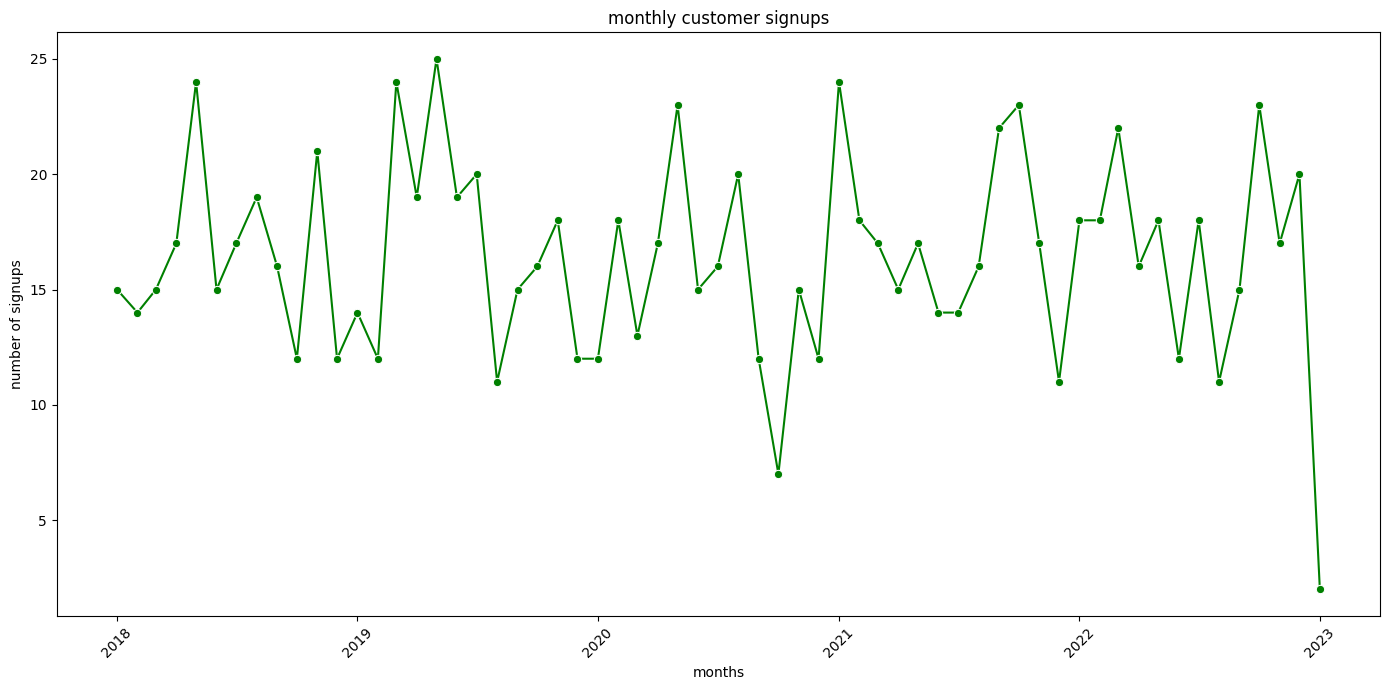

In [77]:
# customer signups by month
customer_signups = customers_df.copy()
customer_signups['year_month'] = customer_signups['signup_date'].dt.to_period('M')
customer_signups = customer_signups.groupby('year_month')['customer_id'].count().reset_index()
customer_signups.rename(columns={'customer_id': 'signups'}, inplace=True)
customer_signups['year_month'] = customer_signups['year_month'].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(data=customer_signups, x='year_month', y='signups', marker='o', color='green')
plt.title('monthly customer signups')
plt.xlabel('months')
plt.ylabel('number of signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from this plot, we are albe to see a lot of change in customer signups over time. This could be due to many different factors such as marketing, economic state of the world and seasonality. It looks like there are spikes in the plot in the end of 2018, early 2019, mid-2020 and 2021. This means the acquisition efforts were succesful, so the promotional offers were working well. There are also many declines in early 2020, mid-2021 and late 2022. This could be due to covid-19 and other related economical impact. There are also part of the plot that are pretty stable, which shows a positive sign of stability.

##### regional sales distribution

I performed a regional sales analysis to see how different regions contribute to the overall sales. This helps us understand which regions provide omst revenue so which regions are important to focus on when it comes to creating local promotions or targeted marketing campagns.

/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/2297189625.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x='region', y='sales_percentage', palette='deep')


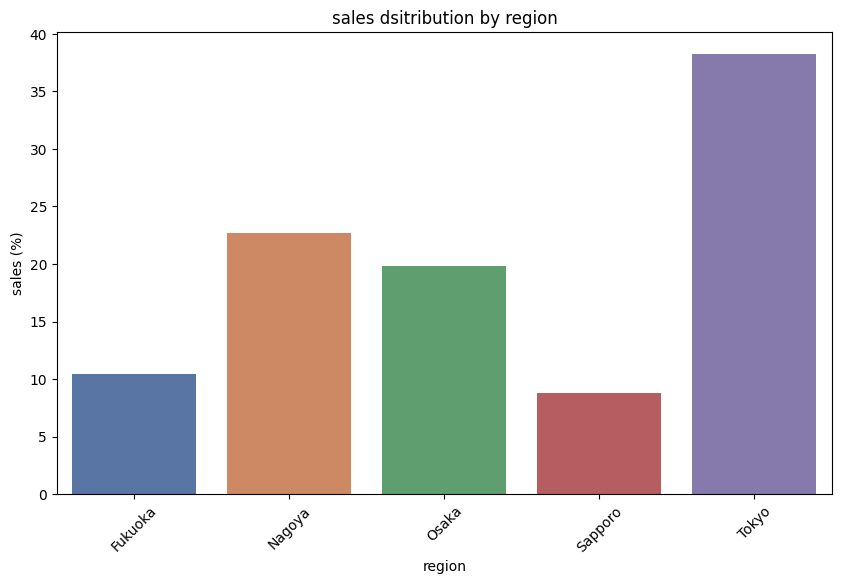

In [78]:
# merge purchases with customers on customer id
purchases_customers_products = purchases_df.merge(customers_df, on='customer_id', how='left').merge(products_df, on='product_id', how='left')
purchases_customers_products['total_sales'] = purchases_customers_products['price'] * purchases_customers_products['quantity']

# sales by region
sales_by_region = purchases_customers_products.groupby('region')['total_sales'].sum().reset_index()
sales_by_region['sales_percentage'] = (sales_by_region['total_sales'] / sales_by_region['total_sales'].sum()) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_region, x='region', y='sales_percentage', palette='deep')
plt.title('sales dsitribution by region')
plt.xlabel('region')
plt.ylabel('sales (%)')
plt.xticks(rotation=45)
plt.show()


we see that Tokyo contributed nearly 40% of total sales, likely due to a large population and strong brand presence. Nagoya and Osaka follow, each contributing around 20-25%. Fukuoka and Sapporo contribute significantly less, indicating opportunities for growth through localized marketing, partnerships, and targeted promotions.

The high concentration of sales in Tokyo presents a risk of market dependence. Expanding efforts in regions like Fukuoka and Sapporo could diversify revenue streams.

##### product performance analysis

I decided to also perform an analysis on what products are performing the best in the market to understand where it is important to focus marketing and inventory on. 

/var/folders/xk/zz8ns7q95t3fzkkdbx_k_tvr0000gn/T/ipykernel_75691/1422009551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='product_name', y='total_sales', palette='Blues_d')


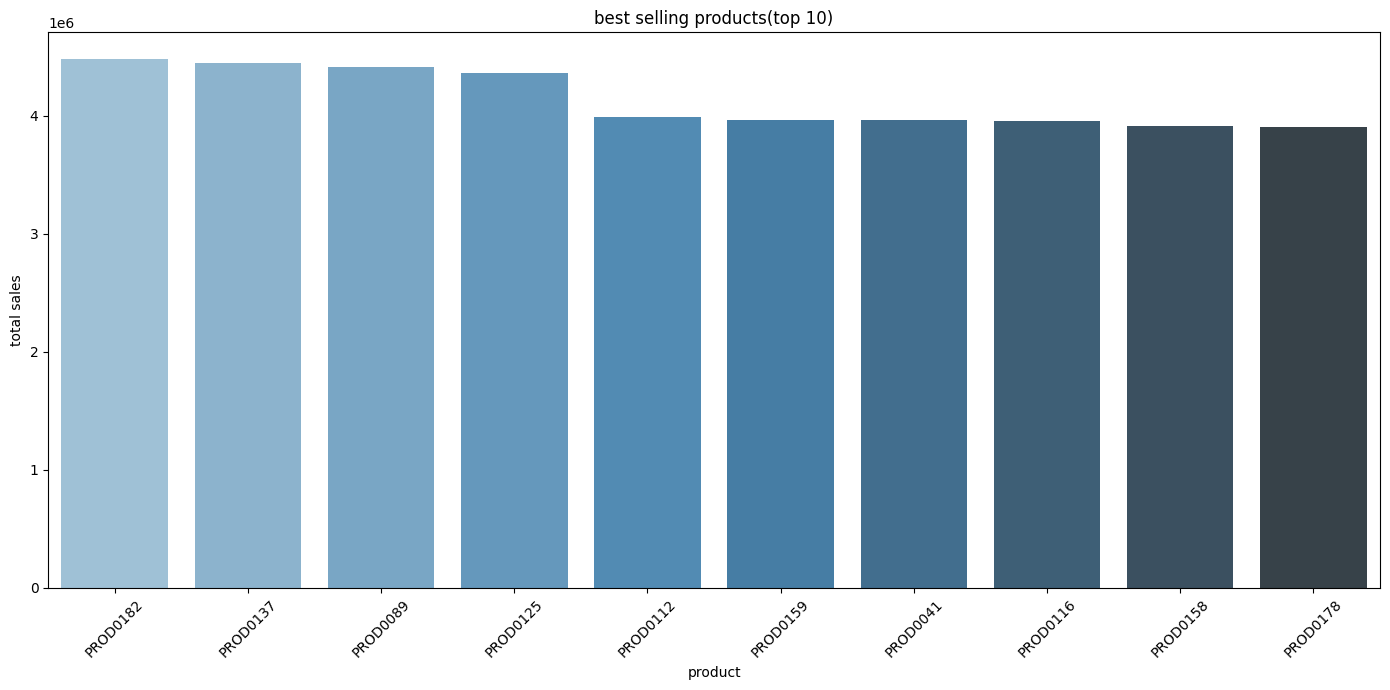

In [79]:
# total sales per product
product_sales = purchases_products.groupby('product_name')['total_sales'].sum().reset_index()
product_sales = product_sales.sort_values('total_sales', ascending=False).head(10)  # Top 10 products

plt.figure(figsize=(14,7))
sns.barplot(data=product_sales, x='product_name', y='total_sales', palette='Blues_d')
plt.title('best selling products(top 10)')
plt.xlabel('product')
plt.ylabel('total sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()